## Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

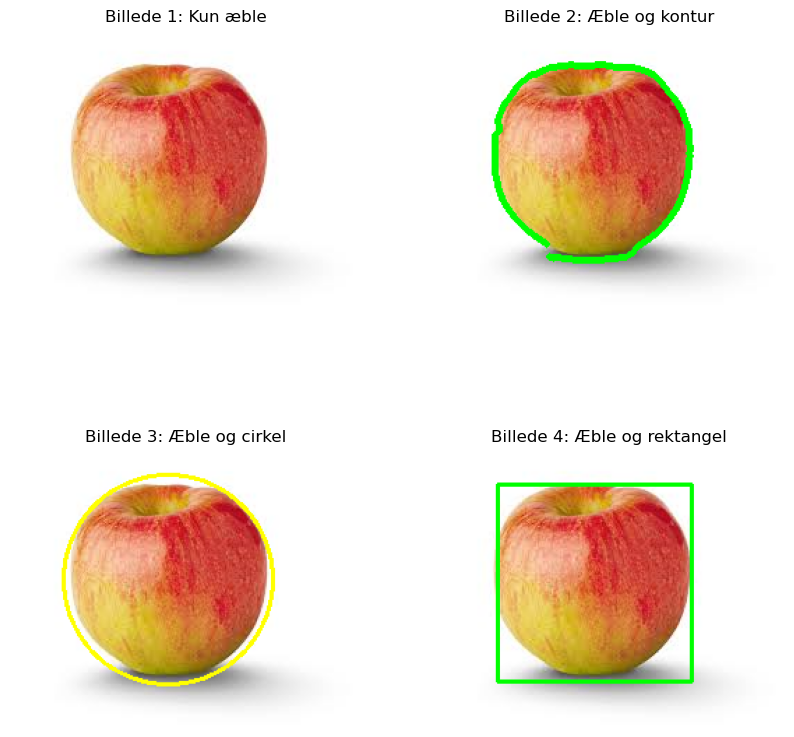

In [115]:
import cv2
import matplotlib.pyplot as plt

# Læs billedet af æblet
img = cv2.imread('apple.jpeg')

# Opret separate billeder
img1 = img.copy()
img2 = img.copy()
img3 = img.copy()
img4 = img.copy()


# Konverter billedet til gråtone
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Anvend en Gaussisk sløringsfilter for at reducere støj
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Anvend Canny-kantdetektoren for at finde kanterne i billedet
edges = cv2.Canny(blur, 60, 180)

# Find konturen af æblet
#contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

contour_index = max(range(len(contours)), key=lambda i: cv2.contourArea(contours[i])) 

# Tegn konturen på billedet
cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)


# Find den mindste omsluttende cirkel omkring konturen
(x, y), radius = cv2.minEnclosingCircle(contours[contour_index])
center = (int(x), int(y))

# Tegn cirklen på det tredje billede
cv2.circle(img3, center, int(radius), (0, 255, 255), 2)

# Find koordinaterne af det omkransende rektangel
x, y, w, h = cv2.boundingRect(contours[contour_index])

# Tegn rektanglet på det fjerde billede
cv2.rectangle(img4, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Vis de fire billeder
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Billede 1: Kun æble")

axs[0, 1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("Billede 2: Æble og kontur")

axs[1, 0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Billede 3: Æble og cirkel")

axs[1, 1].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Billede 4: Æble og rektangel")

# Skjul akse
for ax in axs.flat:
    ax.axis("off")

plt.show()


Antal æbler i billedet: 3


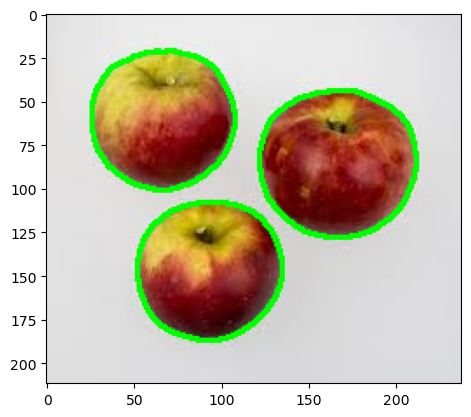

In [117]:
import cv2
import matplotlib.pyplot as plt

def filter_contours(contours, min_area):
    filtered_contours = []

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            filtered_contours.append(contour)

    return filtered_contours

# Læs billedet med tre æbler
img = cv2.imread('3apples.jpeg')

# Konverter billedet til gråtone
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Anvend en Gaussisk sløringsfilter for at reducere støj
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Anvend Canny-kantdetektoren for at finde kanterne i billedet
edges = cv2.Canny(blur, 60, 150)

# Find konturerne
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrer konturerne baseret på et minimumsareal (eksperimentér med værdien for at finde den optimale tærskel for dit billede)
min_area = 1000
filtered_contours = filter_contours(contours, min_area)

# Antallet af æbler er lig med antallet af filtrerede konturer
number_of_apples = len(filtered_contours)

print(f"Antal æbler i billedet: {number_of_apples}")

# Tegn konturerne på billedet
cv2.drawContours(img, filtered_contours, -1, (0, 255, 0), 2)

# Vis det modificerede billede
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
